**Efekt Rungego**

In [35]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

**Zadanie 1.**

In [36]:
# Functions definition
f1 = np.vectorize(lambda x: 1/(1 + 25*x**2))
f2 = np.vectorize(lambda x: np.exp(np.cos(x)))

In [37]:
# Lagrange interpolation polynomial
lagrange_coefficients = lambda t, j, x: np.prod(t-x[x!=x[j]])/np.prod(x[j]-x[x!=x[j]])
lagrange_polynomial = lambda t, x, y: np.sum([y[j] * lagrange_coefficients(t, j, x) for j in range(len(y))])

# Cubic spline interpolation polynomial
cubic_spline_polynomial = lambda x, y: scipy.interpolate.interp1d(x, y, kind='cubic')

# Lagrange interpolation polynomial using Chebyshev nodes
chebyshev_nodes = lambda a, b, n: np.array([0.5*(a + b) + 0.5*(b - a)*np.cos((2*j + 1)*np.pi/(2*n))
                                             for j in range(n)])

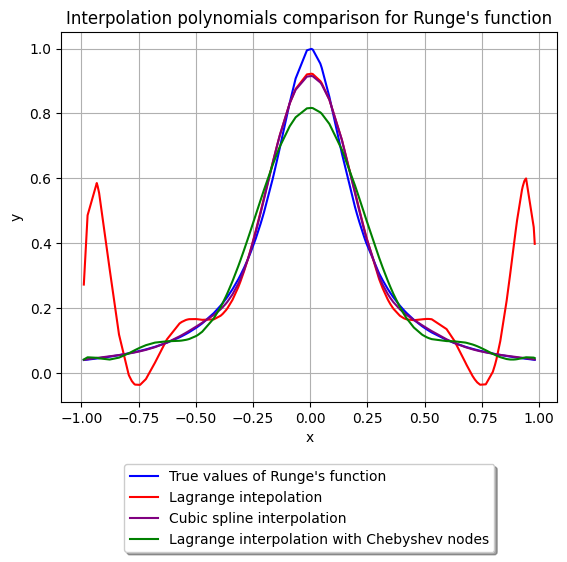

In [45]:
# Polynomials plot
n = 12
x = np.linspace(-1.0, 1.0, n, endpoint=True)
x_chebyshev = chebyshev_nodes(-1.0, 1.0, n)
y = f1(x)
y_chebyshev = f1(x_chebyshev)
t = sorted(np.random.uniform(-1.0, 1.0, size=10*n))
plt.plot(t, f1(t), label="True values of Runge's function", color="blue")
plt.plot(t, [lagrange_polynomial(j, x, y) for j in t], label="Lagrange intepolation", color="red")
plt.plot(t, cubic_spline_polynomial(x, y)(t), label="Cubic spline interpolation", color="purple")
plt.plot(t, [lagrange_polynomial(j, x_chebyshev, y_chebyshev) for j in t], label="Lagrange interpolation with Chebyshev nodes"
         , color="green")
plt.title("Interpolation polynomials comparison for Runge's function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

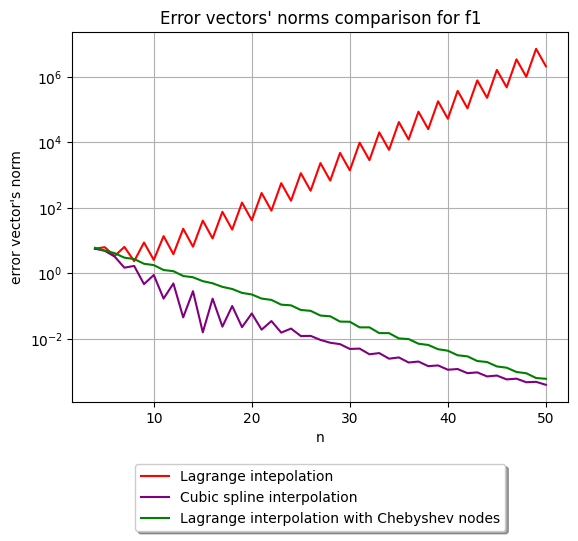

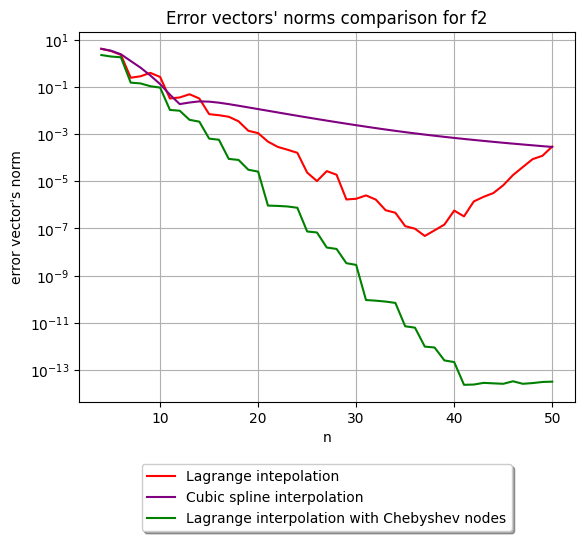

In [46]:
# Error vectors' norms plot
n_range = range(4,51)

# Function f1
t = sorted(np.random.uniform(-1.0, 1.0, size=500))
true_values = f1(t)
errors = [[] for _ in range(3)]

for n in n_range:
    x = np.linspace(-1.0, 1.0, n, endpoint=True)
    x_chebyshev = chebyshev_nodes(-1.0, 1.0, n)
    y = f1(x)
    y_chebyshev = f1(x_chebyshev)
    lagrange_error = np.linalg.norm(
        true_values - np.array([lagrange_polynomial(j, x, y) for j in t]))
    cubic_spline_error = np.linalg.norm(true_values - cubic_spline_polynomial(x, y)(t))
    chebyshev_error = np.linalg.norm(
        true_values - np.array([lagrange_polynomial(j, x_chebyshev, y_chebyshev) for j in t]))
    errors[0].append(lagrange_error)
    errors[1].append(cubic_spline_error)
    errors[2].append(chebyshev_error)
 
plt.title("Error vectors' norms comparison for f1")
plt.plot(n_range, errors[0], color="red", label="Lagrange intepolation")
plt.plot(n_range, errors[1], color="purple", label="Cubic spline interpolation")
plt.plot(n_range, errors[2], color="green", label="Lagrange interpolation with Chebyshev nodes")
plt.yscale("log")
plt.xlabel("n")
plt.ylabel("error vector's norm")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

# Function f2
t = sorted(np.random.uniform(0.0, 2.0*np.pi, size=500))
true_values = f2(t)
errors = [[] for _ in range(3)]

for n in n_range:
    x = np.linspace(0.0, 2.0*np.pi, n, endpoint=True)
    x_chebyshev = chebyshev_nodes(0.0, 2.0*np.pi, n)
    y = f2(x)
    y_chebyshev = f2(x_chebyshev)
    t1 = sorted(np.random.uniform(-1.0, 1.0, size=500))
    lagrange_error = np.linalg.norm(
        true_values - np.array([lagrange_polynomial(j, x, y) for j in t]))
    cubic_spline_error = np.linalg.norm(true_values - cubic_spline_polynomial(x, y)(t))
    chebyshev_error = np.linalg.norm(
        true_values - np.array([lagrange_polynomial(j, x_chebyshev, y_chebyshev) for j in t]))
    errors[0].append(lagrange_error)
    errors[1].append(cubic_spline_error)
    errors[2].append(chebyshev_error)
    
plt.title("Error vectors' norms comparison for f2")
plt.plot(n_range, errors[0], color="red", label="Lagrange intepolation")
plt.plot(n_range, errors[1], color="purple", label="Cubic spline interpolation")
plt.plot(n_range, errors[2], color="green", label="Lagrange interpolation with Chebyshev nodes")
plt.yscale("log")
plt.xlabel("n")
plt.ylabel("error vector's norm")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()